In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")

Dataset Information:

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed
 from the database, replaced with dummy values.


In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
df = df.rename(columns={"cp": "chestpain", "fbs": "fasting_blood_sugar"})

In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   int64  
 1   sex                  1025 non-null   int64  
 2   chestpain            1025 non-null   int64  
 3   trestbps             1025 non-null   int64  
 4   chol                 1025 non-null   int64  
 5   fasting_blood_sugar  1025 non-null   int64  
 6   restecg              1025 non-null   int64  
 7   thalach              1025 non-null   int64  
 8   exang                1025 non-null   int64  
 9   oldpeak              1025 non-null   float64
 10  slope                1025 non-null   int64  
 11  ca                   1025 non-null   int64  
 12  thal                 1025 non-null   int64  
 13  target               1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.isnull().sum()

age                    0
sex                    0
chestpain              0
trestbps               0
chol                   0
fasting_blood_sugar    0
restecg                0
thalach                0
exang                  0
oldpeak                0
slope                  0
ca                     0
thal                   0
target                 0
dtype: int64

### EDA

In [8]:
pd.set_option("display.float_format", lambda x: "%3f" %x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.000000,54.434146,9.072290,29.000000,48.000000,56.000000,61.000000,77.000000
sex,1025.000000,0.695610,0.460373,0.000000,0.000000,1.000000,1.000000,1.000000
chestpain,1025.000000,0.942439,1.029641,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,1025.000000,131.611707,17.516718,94.000000,120.000000,130.000000,140.000000,200.000000
chol,1025.000000,246.000000,51.592510,126.000000,211.000000,240.000000,275.000000,564.000000
fasting_blood_sugar,1025.000000,0.149268,0.356527,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,1025.000000,0.529756,0.527878,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,1025.000000,149.114146,23.005724,71.000000,132.000000,152.000000,166.000000,202.000000
exang,1025.000000,0.336585,0.472772,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,1025.000000,1.071512,1.175053,0.000000,0.000000,0.800000,1.800000,6.200000


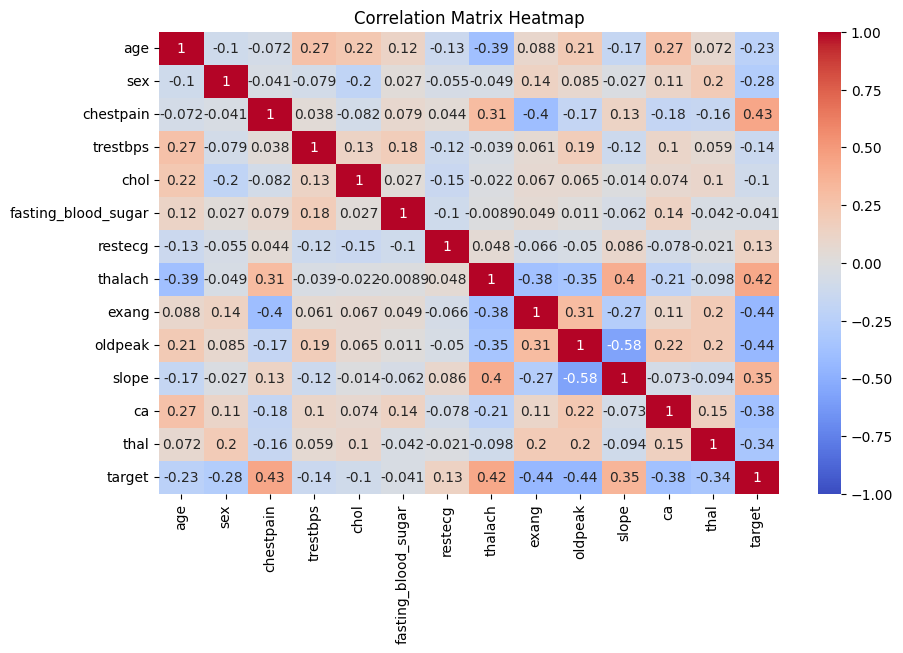

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')  # Set the title
plt.show()

### Checking for duplicates

In [10]:
df.duplicated().sum()

723

In [11]:
df.shape

(1025, 14)

In [12]:
df = df.drop_duplicates()

<Axes: >

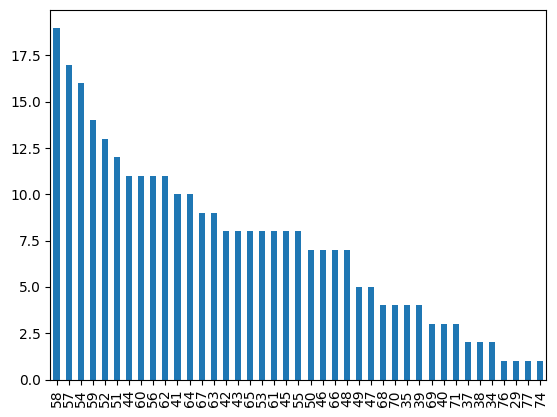

In [13]:
df["age"].value_counts().plot(kind= "bar")

In [14]:
df["age"].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

In [15]:
# Define the age bins and labels
bins = [0, 18, 30, 40, 50, 60, 70, 80]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Use pd.cut() to create age groups
df["age_groups"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)


<Axes: >

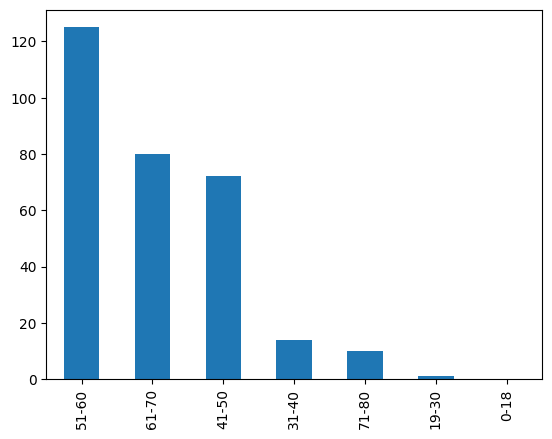

In [16]:
df["age_groups"].value_counts().plot(kind= "bar")

In [17]:
pd.get_dummies(df["age_groups"])

,0-18,19-30,31-40,41-50,51-60,61-70,71-80
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
723,0,0,0,0,0,1,0
733,0,0,0,1,0,0,0
739,0,0,0,0,1,0,0
843,0,0,0,0,1,0,0


### Here
### 1 is unhealthy heart &
### 0 is healthy heart

In [18]:
df["target"].value_counts(normalize = True)*100

1   54.304636
0   45.695364
Name: target, dtype: float64

<Axes: >

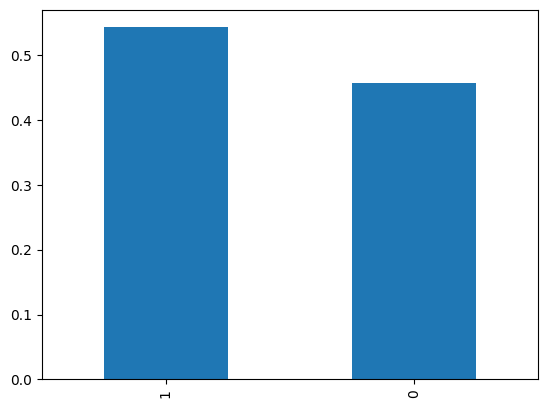

In [19]:
df["target"].value_counts(normalize = True).plot(kind = "bar")

In [20]:
df.groupby("sex").mean()

<ipython-input-20-4636136becc0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("sex").mean()


,age,chestpain,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125000,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,130.912621,239.601942,0.160194,0.504854,148.844660,0.373786,1.120874,1.383495,0.796117,2.402913,0.446602


In [21]:
df["sex_cat"] = df["sex"].replace([0,1],["female","male"])

In [22]:
 df.groupby("sex_cat")["target"].mean()

sex_cat
female   0.750000
male     0.446602
Name: target, dtype: float64

catplot is used for categorical variables or columns

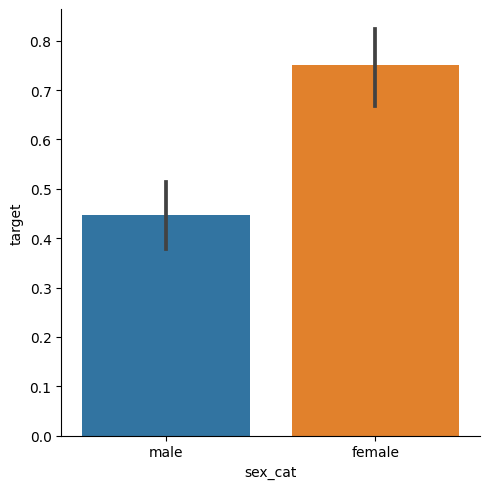

In [30]:
sns.catplot(data = df, y = "target", x = "sex_cat", kind = "bar")

Analysis based on gender and age

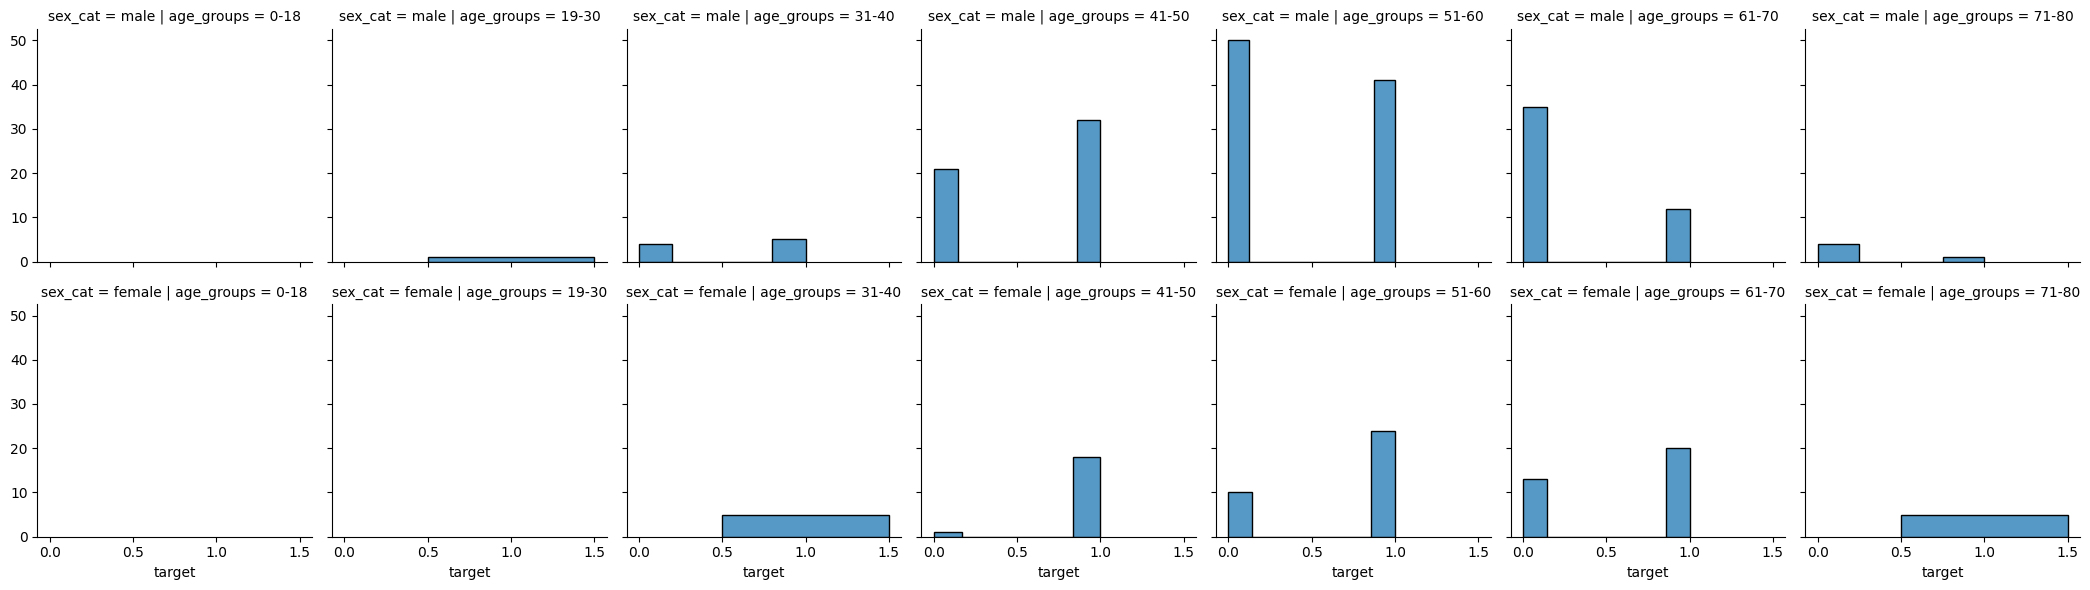

In [50]:
g = sns.FacetGrid(df,row = "sex_cat", col = "age_groups")
g.map(sns.histplot,"target")

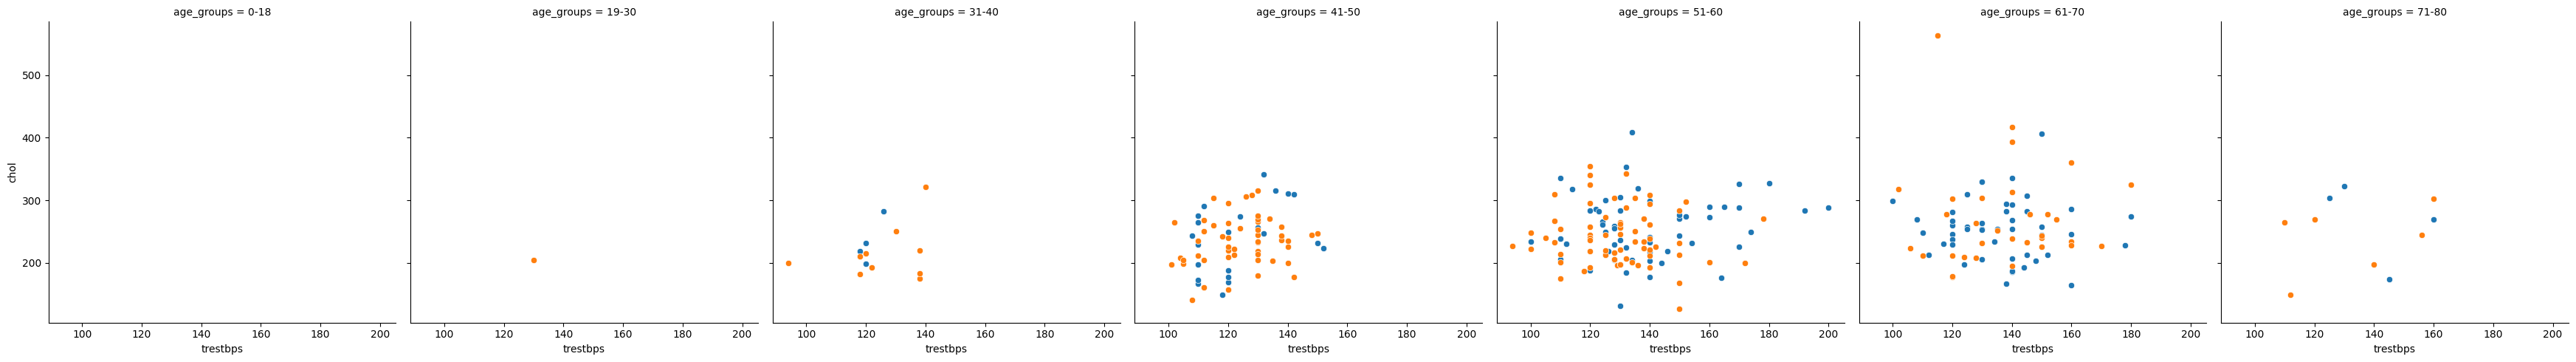

In [52]:
g = sns.FacetGrid(df,hue= "target", col = "age_groups", height = 5)
g.map(sns.scatterplot,"trestbps","chol")

<Axes: xlabel='age_groups', ylabel='chol'>

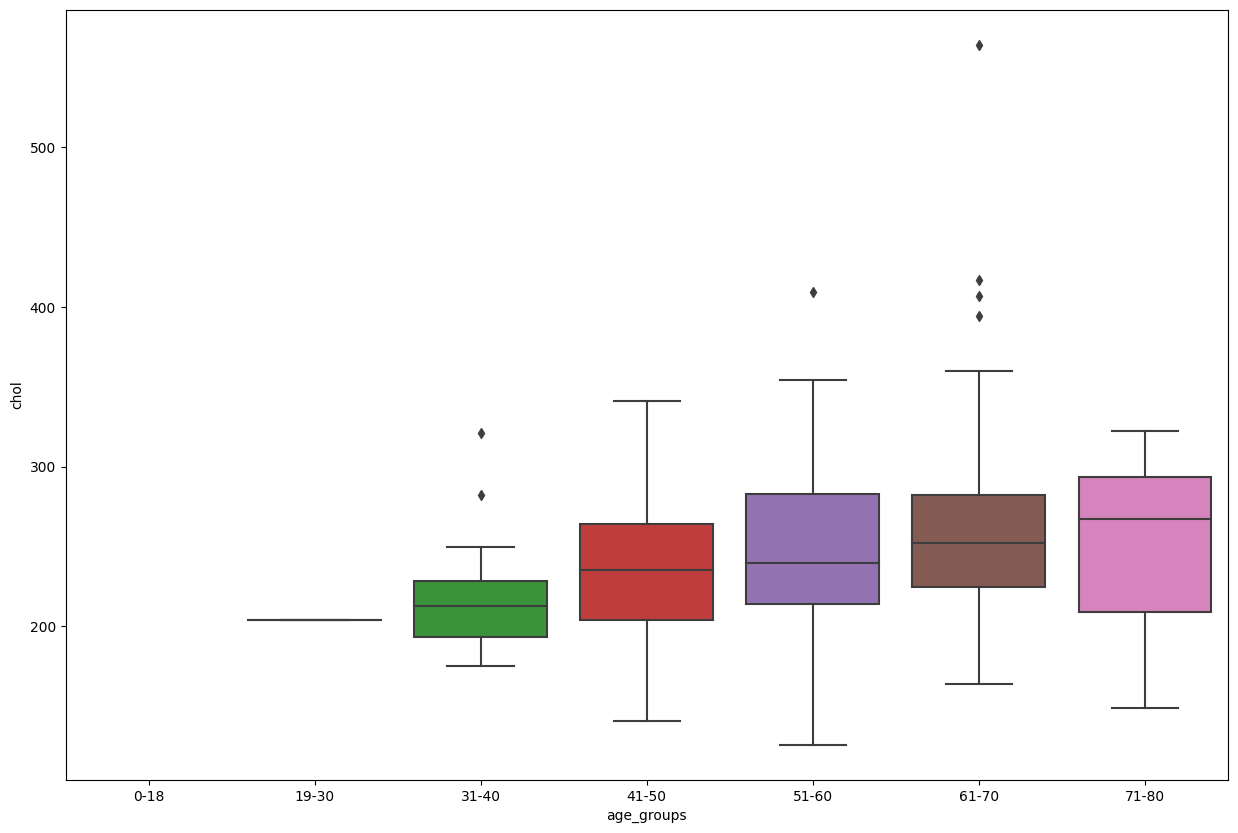

In [53]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = df, x = "age_groups", y = "chol", ax = ax)

<ipython-input-87-43ebb16fdae6>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df["target"]).plot.bar(figsize = (20,10), title = "Correlation with target", fontsize = 15, rot = 45, grid = True, color = c)


<Axes: title={'center': 'Correlation with target'}>

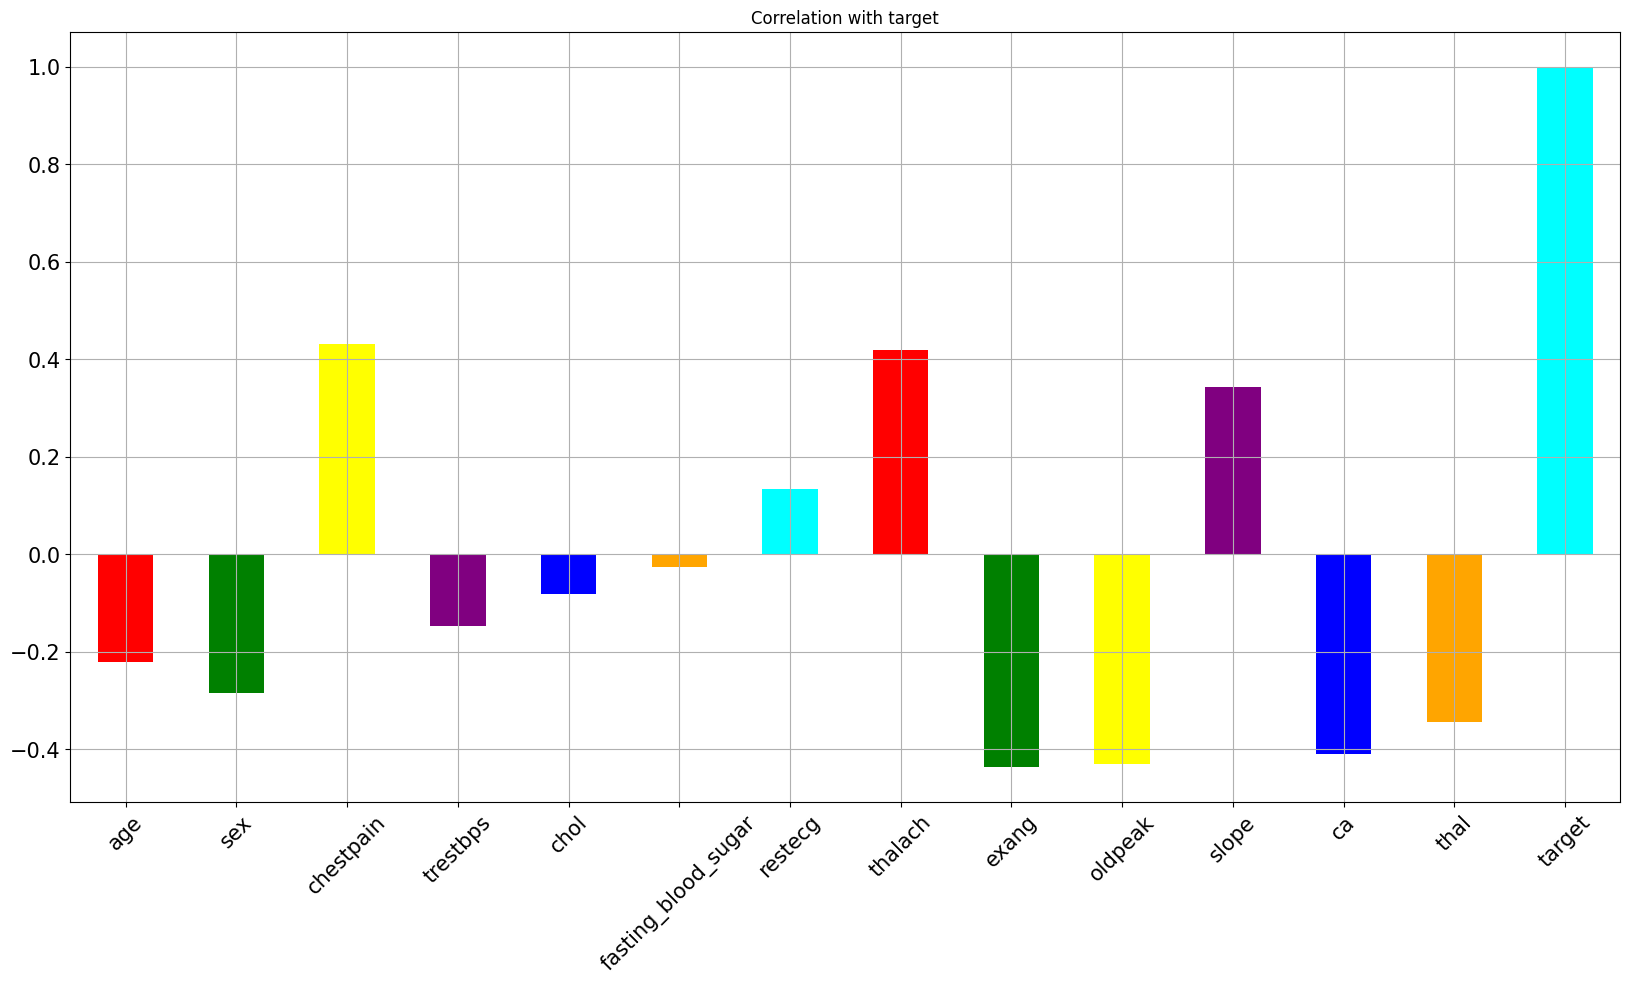

In [87]:
c = ["red","green","yellow","purple","blue","orange","cyan"]
df.corrwith(df["target"]).plot.bar(figsize = (20,10), title = "Correlation with target", fontsize = 15, rot = 45, grid = True, color = c)

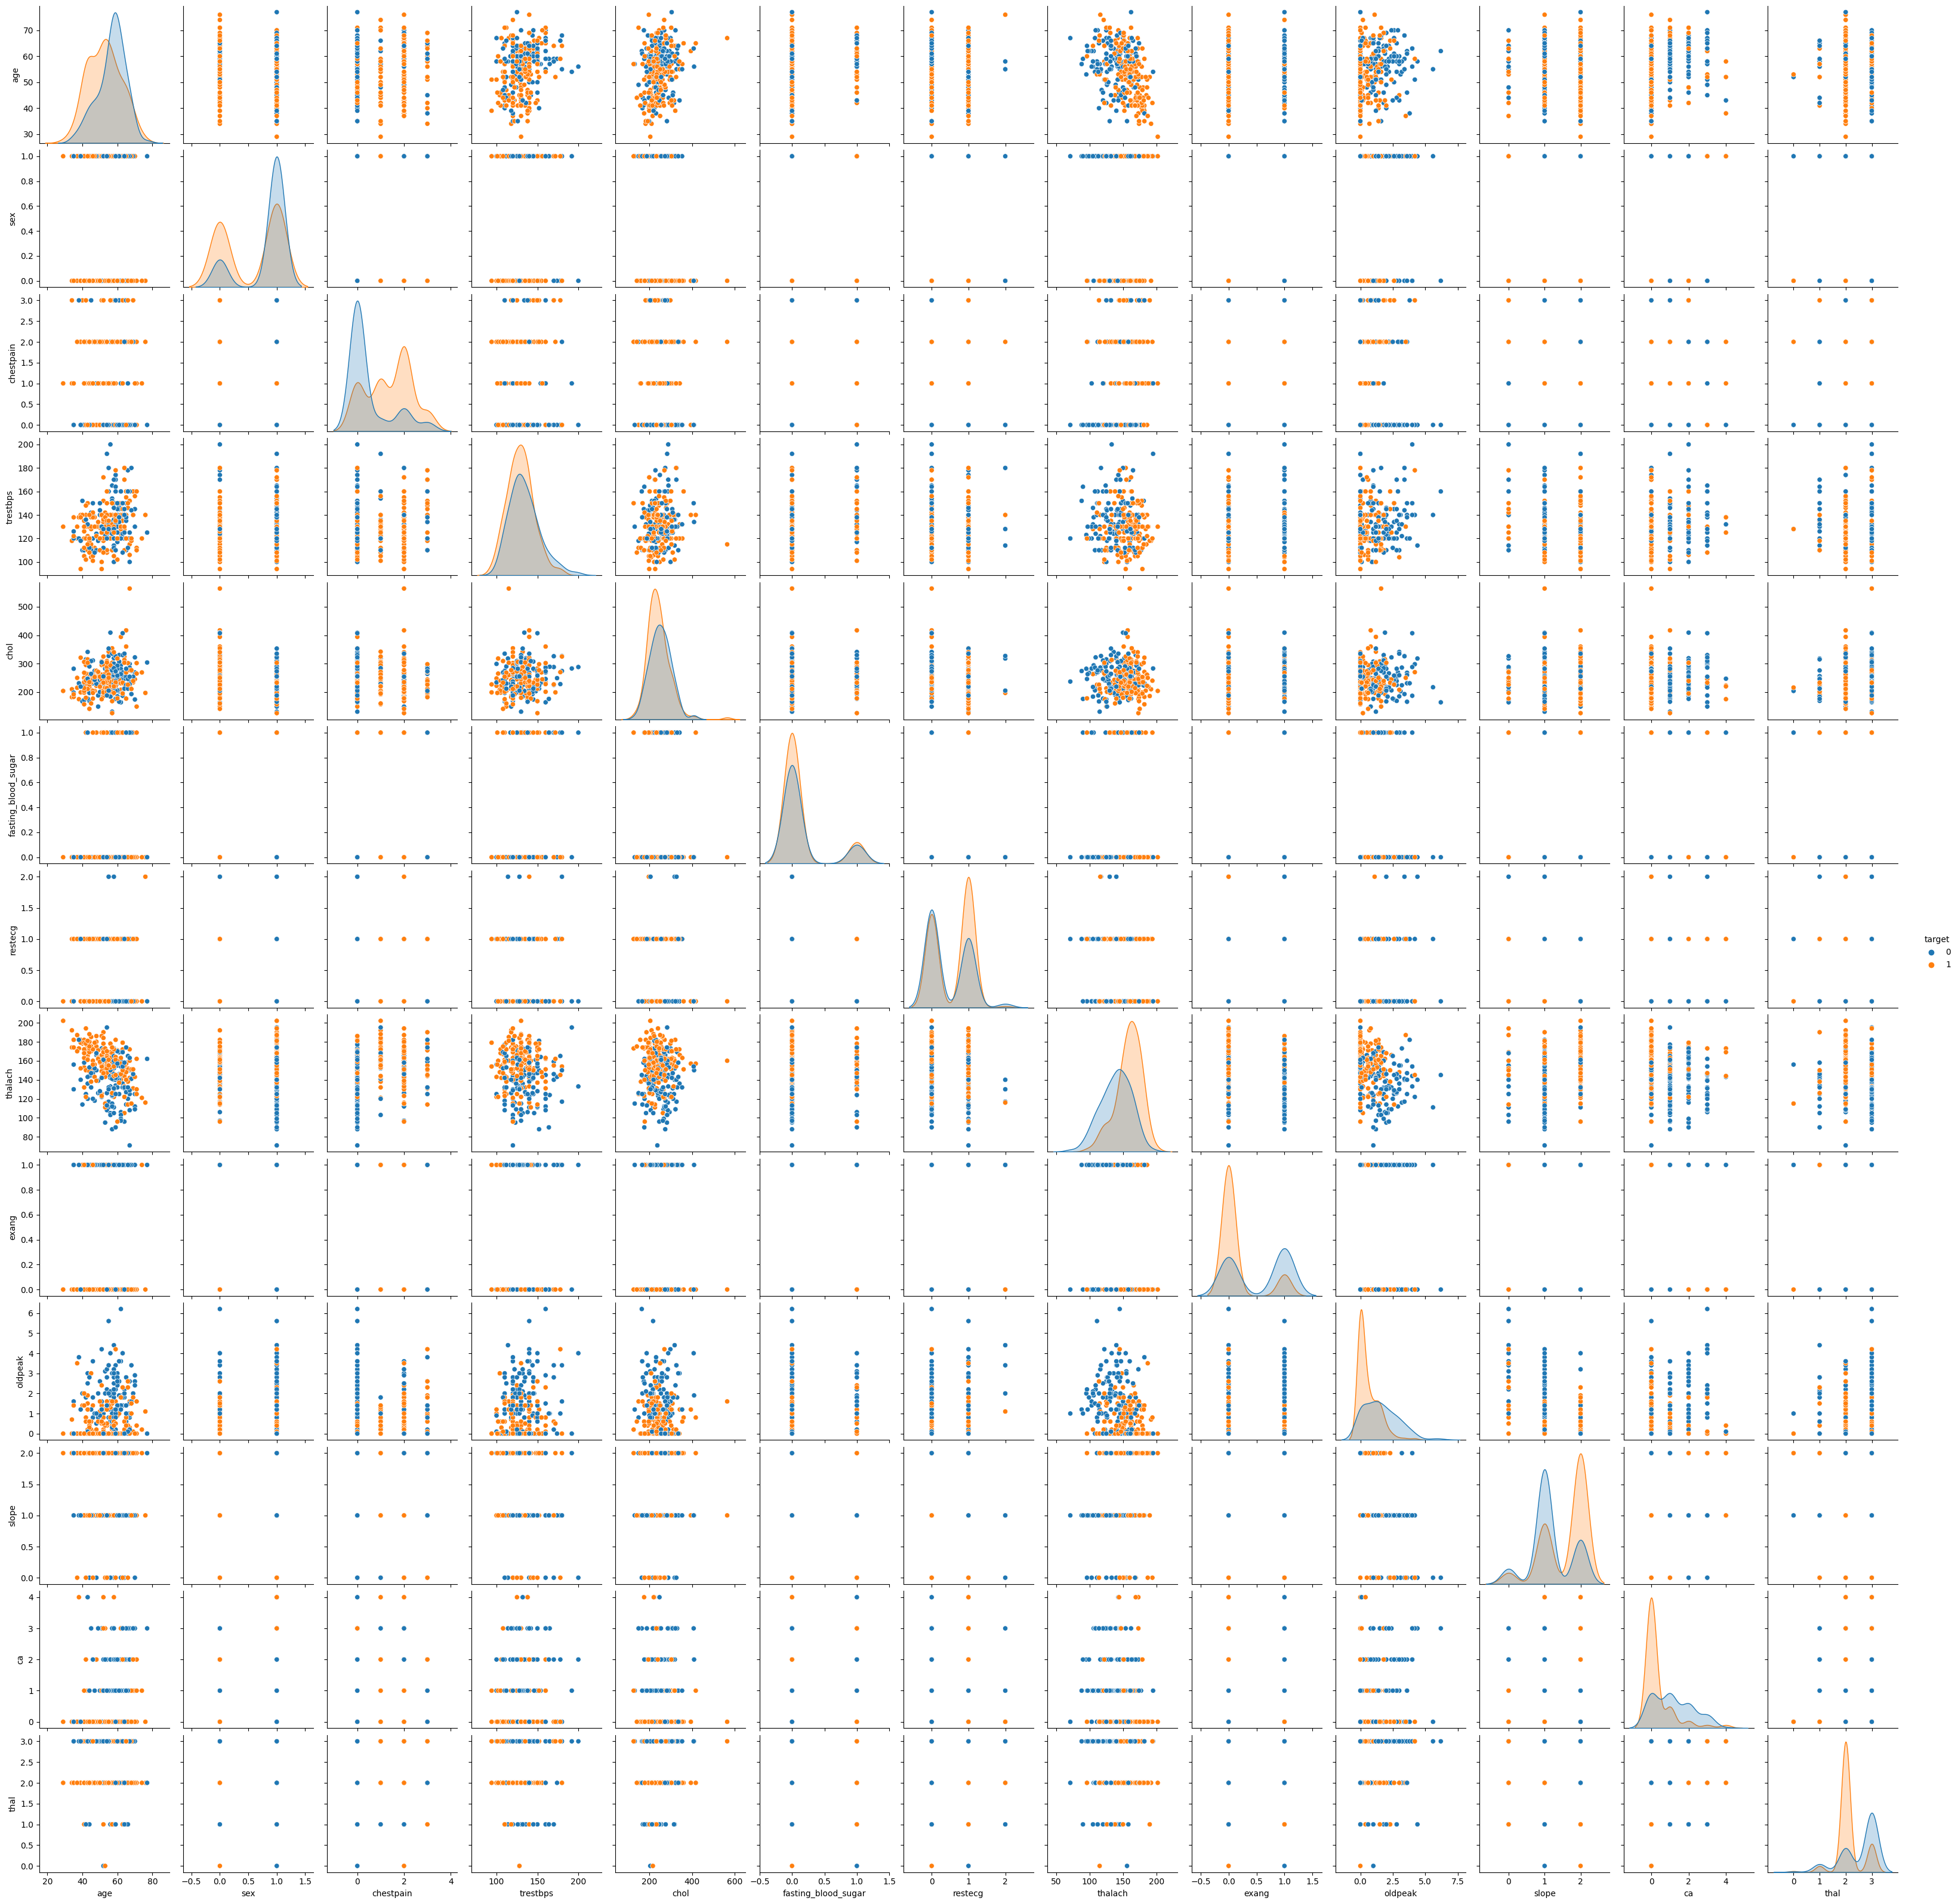

In [54]:
sns.pairplot(df, hue='target')

### Machine Learning Algorithm

In [55]:
df["target"].value_counts(normalize=True)

1   0.543046
0   0.456954
Name: target, dtype: float64

In [56]:
X = df.drop(columns = ["target"], axis = 1)
Y = df["target"]

In [57]:
X = X.drop(columns = ["age_groups"], axis = 1)
X = X.drop(columns = ["sex_cat"], axis = 1)

In [58]:
X

,age,sex,chestpain,trestbps,chol,fasting_blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.500000,1,0,2
733,44,0,2,108,141,0,1,175,0,0.600000,1,0,2
739,52,1,0,128,255,0,1,161,1,0.000000,2,1,3
843,59,1,3,160,273,0,0,125,0,0.000000,2,0,2


In [59]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

Spliting the dataset into training and testing

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(302, 13) (241, 13) (61, 13)


In [61]:
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler().fit(X_train)
X_train_sc = sc_train.transform(X_train)

In [64]:
from sklearn.preprocessing import StandardScaler
sc_test = StandardScaler().fit(X_test)
X_test_sc = sc_test.transform(X_test)

### Training the model

#### Here because it is a binary based model, we are using a logisticregression model

In [62]:
model_lr = LogisticRegression(solver = "liblinear")

In [63]:
model_lr.fit(X_train_sc, Y_train)

LogisticRegression(solver='liblinear')

In [44]:
model = LogisticRegression()
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation through accuracy

In [79]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [81]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8464730290456431


In [80]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [82]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9016393442622951


In [83]:
results = model_lr.score(X_train_sc, Y_train)
print(results)

0.8589211618257261


In [76]:
results = model_lr.score(X_test_sc, Y_test)
print(results)

0.8360655737704918
